## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""


Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler

def preproc_x(x, flatten=True):
    if flatten:
        x = x.reshape((len(x), -1))
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(x)
    x = scaler.transform(x)
    return x


def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,256,512]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               33024     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 512)               131584    
_________________________________________________________________
output (Dense)               (None, 10)                5130

In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
  512/50000 [..............................] - ETA: 18:49 - loss: 2.3094 - accuracy: 0.1016

C:\Users\admin\Anaconda3\envs\tensor_flow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.188063). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 432s 9ms/step - loss: 1.6838 - accuracy: 0.4022 - val_loss: 1.5217 - val_accuracy: 0.4657
Epoch 2/100
50000/50000 [==============================] - 22s 441us/step - loss: 1.4534 - accuracy: 0.4851 - val_loss: 1.4475 - val_accuracy: 0.4884
Epoch 3/100
50000/50000 [==============================] - 19s 375us/step - loss: 1.3394 - accuracy: 0.5262 - val_loss: 1.4286 - val_accuracy: 0.4950
Epoch 4/100
50000/50000 [==============================] - 19s 390us/step - loss: 1.2446 - accuracy: 0.5586 - val_loss: 1.3889 - val_accuracy: 0.5117
Epoch 5/100
50000/50000 [==============================] - 18s 369us/step - loss: 1.1605 - accuracy: 0.5888 - val_loss: 1.3855 - val_accuracy: 0.5177
Epoch 6/100
50000/50000 [==============================] - 18s 357us/step - loss: 1.0851 - accuracy: 0.6160 - val_loss: 1.3604 - val_accuracy: 0.5325
Epoch 7/100
50000/50000 [==============================] - 18s 368us/step - loss: 1.0047 - accuracy: 0.6416 - val

50000/50000 [==============================] - 20s 397us/step - loss: 0.1248 - accuracy: 0.9597 - val_loss: 3.8749 - val_accuracy: 0.5188
Epoch 56/100
50000/50000 [==============================] - 21s 425us/step - loss: 0.1103 - accuracy: 0.9641 - val_loss: 3.7677 - val_accuracy: 0.5226
Epoch 57/100
50000/50000 [==============================] - 22s 435us/step - loss: 0.1078 - accuracy: 0.9649 - val_loss: 3.9530 - val_accuracy: 0.5231
Epoch 58/100
50000/50000 [==============================] - 23s 456us/step - loss: 0.1219 - accuracy: 0.9617 - val_loss: 3.8427 - val_accuracy: 0.5216
Epoch 59/100
50000/50000 [==============================] - 23s 470us/step - loss: 0.1055 - accuracy: 0.9661 - val_loss: 4.0232 - val_accuracy: 0.5209
Epoch 60/100
50000/50000 [==============================] - 22s 437us/step - loss: 0.0982 - accuracy: 0.9687 - val_loss: 4.0841 - val_accuracy: 0.5259
Epoch 61/100
50000/50000 [==============================] - 23s 468us/step - loss: 0.1217 - accuracy: 0.960

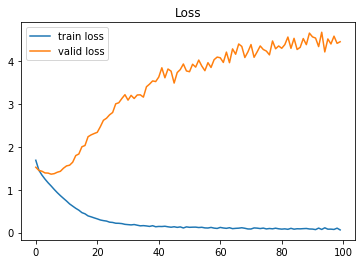

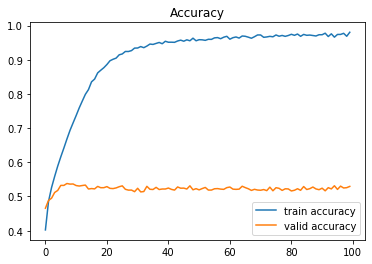

In [17]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()